# **US Accidents Exploratory Data Analysis (EDA) Project**

### **Project by Maryam Panjri**

---

## **Basic Objective for the Case Study**

##### The basic objective of this case study is to comprehensively analyze the US Accident dataset spanning from 2016 to 2023 obtained from Kaggle. 
##### The primary goals are to gain insights into the factors influencing accidents, identify patterns and trends, analyze high/less amount of traffic incidents in areas. Additionally, the study aims to determine the safety levels in different areas, pinpointing regions with lower accident rates for informed decision-making.

---

## **Understanding Data**

##### Using approximately 7.7 million accident records US Accidents dataset of year 2016 to 2023 from Kaggle and will be using this data for analysis. 

---

## **Download the Data**

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url, force = True)

100%|██████████| 653M/653M [03:41<00:00, 3.09MB/s] 


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

---

## **Import the libraries**

In [103]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

---

## **Data Preparation and Cleaning**

1. Load the file using Pandas
2. Look at some information about the data and the columns
3. Fix / Remove any missing or incorrect values which is not useful for analysis.

In [5]:
# Loading the dataset using Pandas
df = pd.read_csv(data_filename)

In [6]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
# Displaying first few rows of the DataFrame
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
# Displaying last few rows of the DataFrame
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
# Getting information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [10]:
# Generating descriptive statistics of the DataFrame's numerical columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
# Obtaining the data types of each columns in the DataFrame
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [12]:
# Obtaining a list of column names in a DataFrame
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
# Getting the total number of elements (the count of all the cells) in a DataFrame
df.size

355506124

In [14]:
# Getting the dimensions of the DataFrame
df.shape

(7728394, 46)

In [15]:
# Checking the numeric columns in the dataset 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include = numerics)

len(numeric_df.columns)

13

##### Filtering out the categorical and numerical variables for a better analysis.

In [68]:
# Filtering out the categorical variables
categorical_data = df.select_dtypes(exclude = np.number)

# Checking out the data
print("Categorical Variables are:")
print(categorical_data.shape) 
print(categorical_data.columns)

Categorical Variables are:
(7728394, 33)
Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [69]:
# Filtering out the numeric values
numeric_data = df.select_dtypes(include = np.number)

print("Numeric Variables are:")
print(numeric_data.shape)
print(numeric_data.columns)

Numeric Variables are:
(7728394, 13)
Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')


##### Checking percentage of missing values per columns

In [64]:
# Counting null values per columns using the `isna().sum()` method and using `sort_values()` method to sort the count of null values in descending order 
df.isna().sum().sort_values(ascending = False) 

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Start_Time                743166
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
No_Exit                        0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station   

In [17]:
# Divinding it by length of the DataFrame to get the missing percentage 
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [18]:
type(missing_percentage)

pandas.core.series.Series

In [19]:
# Removing zeros from the series 
missing_percentage[missing_percentage != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

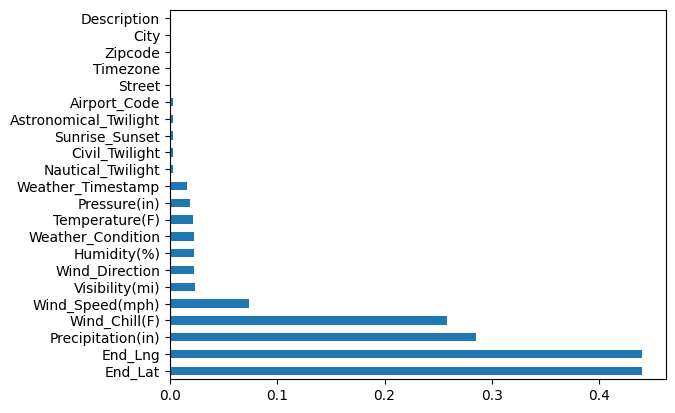

In [20]:
# Visualizing the missing percentage using the horizontal bar i.e. `barh`
missing_percentage[missing_percentage != 0].plot(kind = 'barh')

---

## **Exploratory Analysis and Visualizations**

#### Columns to analyze:
1. City
2. Start Time
3. Start Lat, Start Lng

In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##### **<span style="color:red;">Variable</span>**: **<span style="color:blue;">City (city)</span>**

In [22]:
# Accessing the City column
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [23]:
# getting the unique cities
cities = df.City.unique()
len(cities)

13679

In [24]:
# Counting the population for each city using the `value_counts()` method
cities_by_accident = df.City.value_counts() 
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [25]:
# Top 10 cities with highest population
cities_by_accident[:10]

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

In [26]:
# Checking whether `New York` is present in the `City` column
'New York' in df.City

False

##### From the above result, we can see that New York city is not present in the dataset.

<Axes: ylabel='City'>

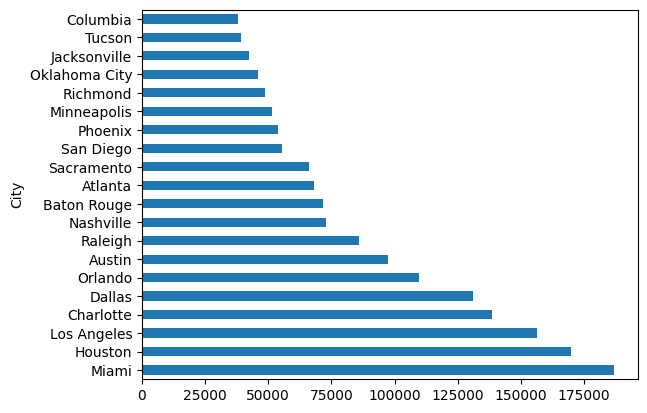

In [27]:
# Visualizing the top 20 cities by accident using the horizontal bar i.e. `barh`
cities_by_accident[:20].plot(kind = 'barh')

In [28]:
type(cities_by_accident)

pandas.core.series.Series

In [29]:
sns.set_style('darkgrid')

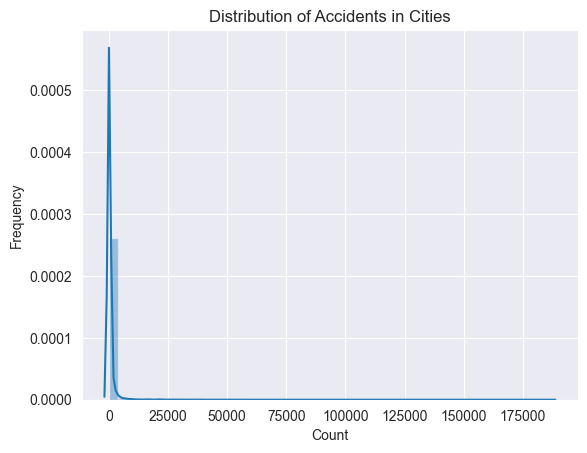

In [110]:
# Visualizing the distribution of cities using a distplot
sns.distplot(cities_by_accident)

# Add title and labels
plt.title('Distribution of Accidents in Cities')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [31]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [32]:
len(high_accident_cities) / len(cities)

0.08904159660793917

<Axes: xlabel='count', ylabel='Count'>

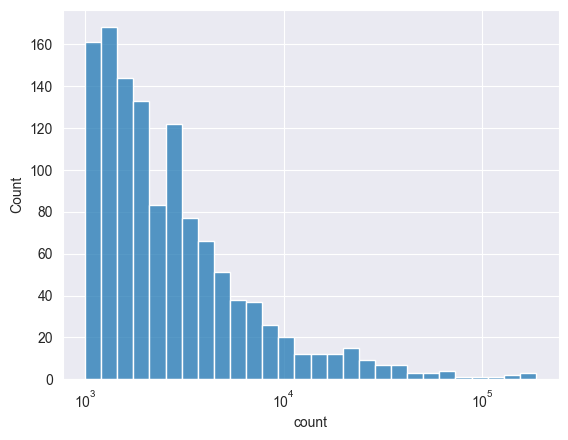

In [33]:
sns.histplot(high_accident_cities, log_scale = True)

<Axes: xlabel='count', ylabel='Count'>

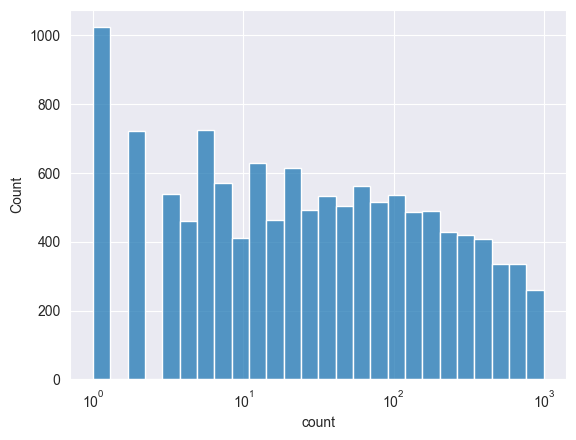

In [34]:
sns.histplot(low_accident_cities, log_scale = True)

In [35]:
cities_by_accident[cities_by_accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

##### **<span style="color:red;">Variable:</span>** **<span style="color:blue;">Start_Time (Start Time)</span>**

In [36]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [37]:
df.Start_Time[0]

'2016-02-08 05:46:00'

##### From above result, we can see that the dates are in a string. So let's parse the dates.

##### There is some variability in the format of datetime strings. Using `errors` parameter in the `pd.to_datetime()` function to handle errors during the conversion process and setting it to `coerce`, which will replace any parsing errors with NaT (Not a Time).

In [38]:
# Parsing the dates using `to_datetime()` method
df.Start_Time = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [39]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [40]:
# Retrieving the hour from datetime
df.Start_Time[0].hour

5

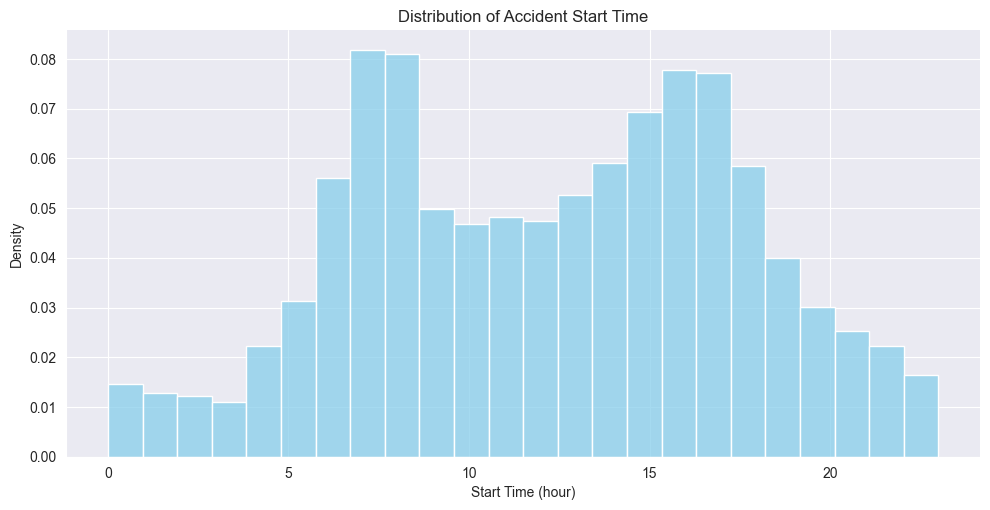

In [111]:
# Using displot for distribution plotting
sns.displot(df.Start_Time.dt.hour, bins = 24, kde = False, stat = 'density', color = 'skyblue', aspect = 2)

# Adding title and labels
plt.title('Distribution of Accident Start Time')
plt.xlabel('Start Time (hour)')
plt.ylabel('Density')

# Displaying the plot
plt.show()

##### What time of the day are accidents most frequent in?
#### **<span style="color:red;">Observation:</span>**

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work and also because of huge amounts of traffic).
- Next highest percentage is 3 pm to 6 pm.

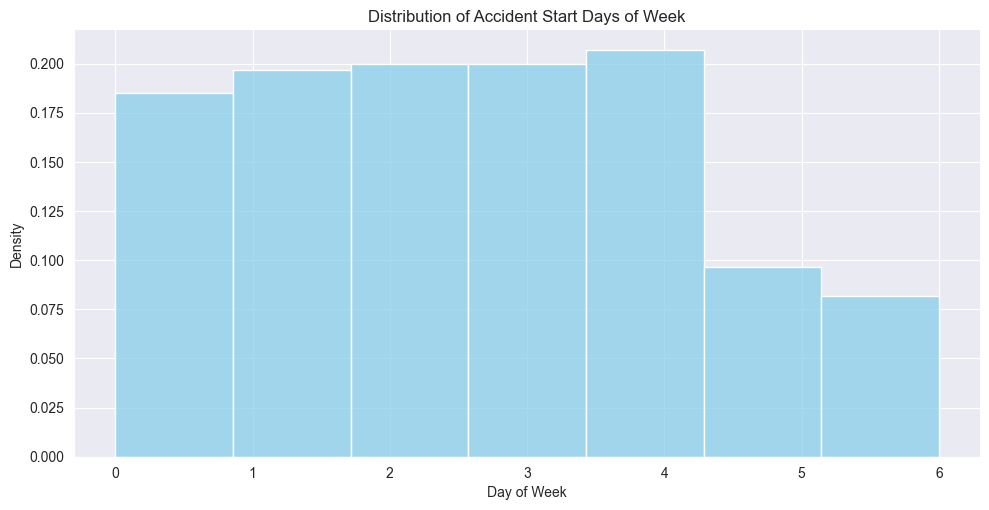

In [108]:
# Use displot for distribution plotting
sns.displot(df['Start_Time'].dt.dayofweek, bins = 7, kde = False, stat = 'density', color = 'skyblue', aspect = 2)

# Add title and labels
plt.title('Distribution of Accident Start Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Density')

# Display the plot
plt.show()

##### Index 0 is equivalent to Monday, Index 1 is equivalent to Tuesday and so on...

##### Which days of the week have the most accidents?
#### **<span style="color:red;">Observation:</span>**
- On weekends the number of accidents is lower.
- Mon, Tue, Wed, Thurs, Fri have the most accidents.

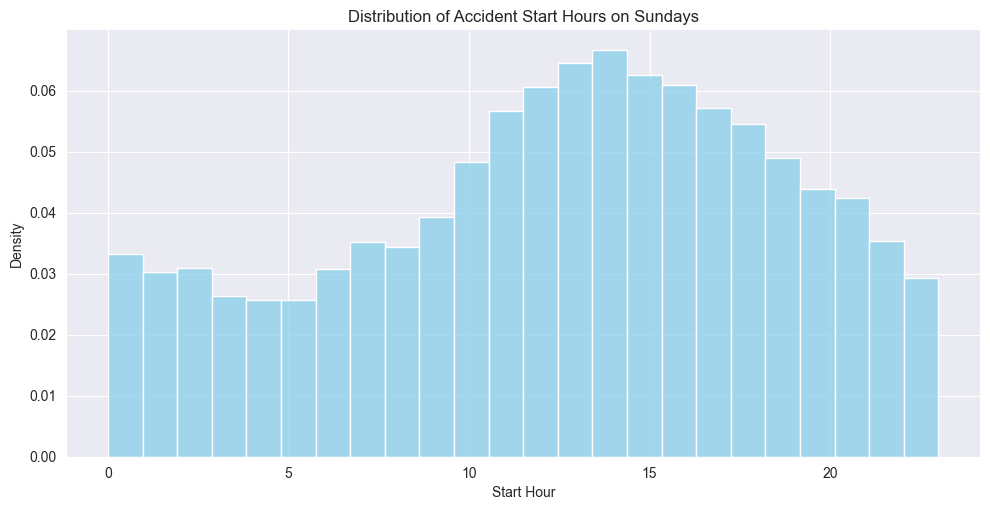

In [107]:
# Filtering data for Sundays
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

# Using displot for distribution plotting
sns.displot(sundays_start_time.dt.hour, bins = 24, kde = False, stat = 'density', color = 'skyblue', aspect = 2)

# Adding title and labels
plt.title('Distribution of Accident Start Hours on Sundays')
plt.xlabel('Start Hour')
plt.ylabel('Density')

# Displaying the plot
plt.show()

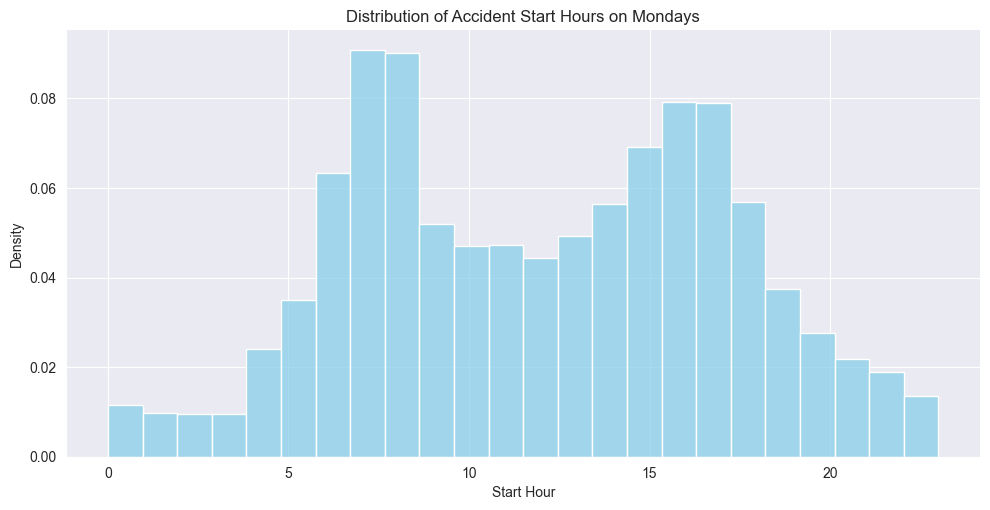

In [106]:
# Filtering data for Mondays
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]

# Using displot for distribution plotting
sns.displot(monday_start_time.dt.hour, bins = 24, kde = False, stat = 'density', color = 'skyblue', aspect = 2)

# Adding title and labels
plt.title('Distribution of Accident Start Hours on Mondays')
plt.xlabel('Start Hour')
plt.ylabel('Density')

# Displaying the plot
plt.show()

##### Is the distribution of accidents by hour the same on weekends as on weekdays?
#### **<span style="color:red;">Observation:</span>**
- On Sunday, the peak occurs between 10 am to 3 pm, unlike the weekdays. 

In [45]:
df.Start_Time.dt.year

0          2016.0
1          2016.0
2          2016.0
3          2016.0
4          2016.0
            ...  
7728389    2019.0
7728390    2019.0
7728391    2019.0
7728392    2019.0
7728393    2019.0
Name: Start_Time, Length: 7728394, dtype: float64

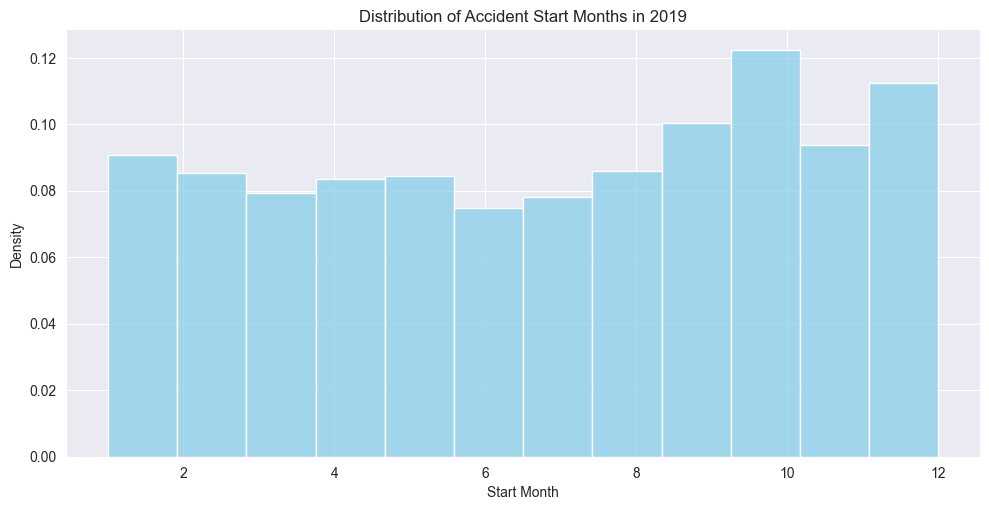

In [105]:
# Filtering data for the year 2019
df_2019 = df[df.Start_Time.dt.year == 2019]

# Using displot for distribution plotting
sns.displot(df_2019['Start_Time'].dt.month, bins = 12, kde = False, stat = 'density', color = 'skyblue', aspect = 2)

# Adding title and labels
plt.title('Distribution of Accident Start Months in 2019')
plt.xlabel('Start Month')
plt.ylabel('Density')

# Displaying the plot
plt.show()

In [47]:
df.Source

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

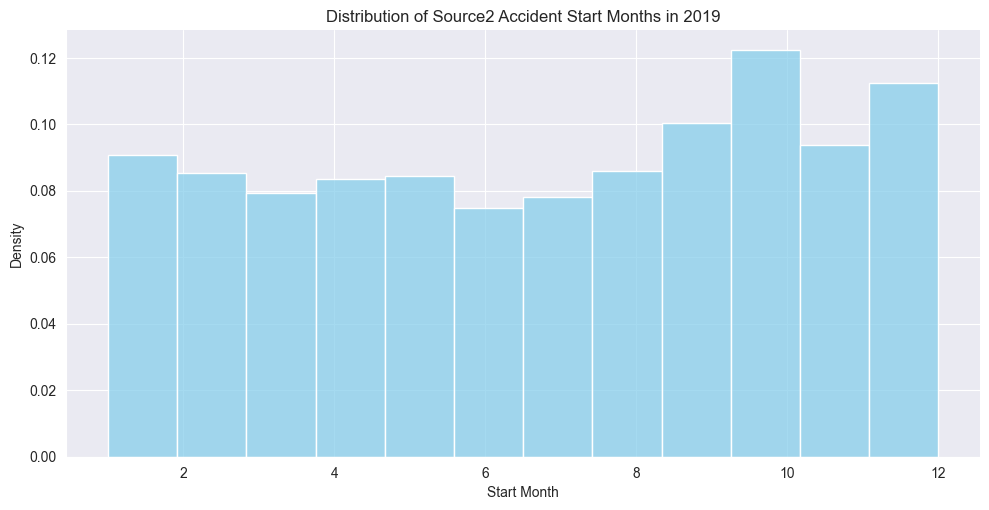

In [104]:
# Filtering data for the year 2019
df_2019 = df[df.Start_Time.dt.year == 2019]

# Filtering data for the year 2019 and Source2
df_2019_Bing = df_2019[df_2019.Source == 'Source2']

# Using displot for distribution plotting
sns.displot(df_2019.Start_Time.dt.month, bins = 12, kde = False, stat = 'density', color = 'skyblue', aspect = 2)

# Adding title and labels
plt.title('Distribution of Source2 Accident Start Months in 2019')
plt.xlabel('Start Month')
plt.ylabel('Density')

# Displaying the plot
plt.show()

##### Where is the month-wise trend of accidents high?
#### **<span style="color:red;">Observation:</span>**
- Much data is missing for 2016. Maybe even 2017.
- There seems to be some issue with the Bing data.

<Axes: ylabel='count'>

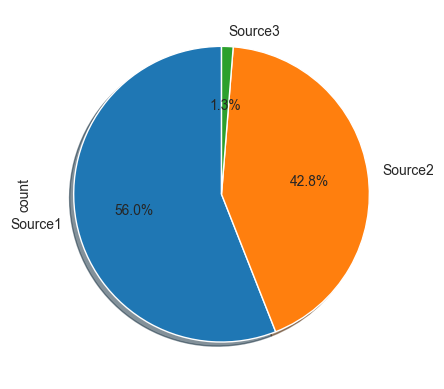

In [96]:
df.Source.value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, shadow = True)

##### Consider excluding Source2 data, as it seems to have some issues.

##### **<span style="color:red;">Variable:</span>** **<span style="color:blue;">Start_Lat and Start_Lng(Start Latitude and Start Longitude)</span>**

In [50]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [51]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [52]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

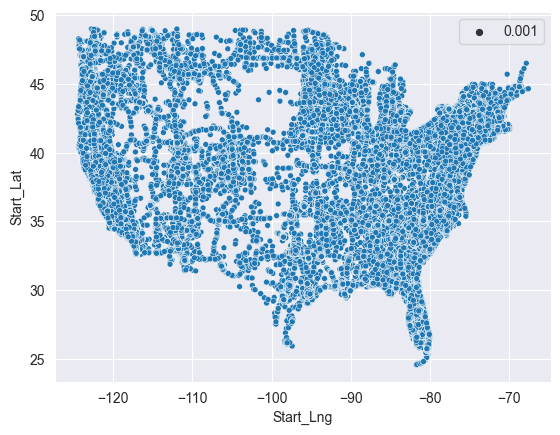

In [53]:
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)

In [54]:
lat, lng = df.Start_Lat[0], df.Start_Lng[0]
lat, lng

(39.865147, -84.058723)

In [56]:
sample_df = df.sample(int(0.001 * len(df)))

lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [57]:
map = folium.Map()

HeatMap(lat_lng_pairs).add_to(map)

map

#### **<span style="color:red;">Observation:</span>**
- From the above map, it seems both the coast have high percentage of accidents and very few or null accidents in the middle regions.

---

## **Summary and Conclusion**

### **<span style="color:red;">Insights:</span>**
- No data from New York exists in this dataset.
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)
- The number of accidents per city decreases / increases exponentially.

---